\author{Fan Jiang}
# Introduction

This is the solution for DSP Autumn 2015 Homework 3.


# Exercise Problems

## Question 1

Let $x(n) = (0.9\exp(j\pi/3))^n, 0 \leq n \leq 10$ . Determine $X(e^{j\omega})$ and plot
$X(e^{j\omega})$ at 401 frequencies between $[−2\pi,2\pi]$ to observe its periodicity.


#### Solution:


In [29]:
pkg load signal

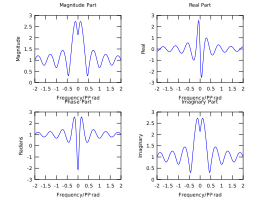

In [2]:
w=[-200:1:200]*4*pi/400;
X=1-(0.9*exp(j*w./3)).^11./(ones(1,401)-0.9*exp(j*w./3));
magX=abs(X); angX=angle(X);
realX=real(X);
imagX=imag(X);
gca=subplot(2,2,1);

plot(w/pi,magX,'fontsize',5);
xlabel('Frequency/Pi*rad','fontsize',5);
ylabel('Magnitude','fontsize',5);
title('Magnitude Part','fontsize',5);
subplot(2,2,3);
h=get(gcf, "currentaxes");
set(h, "fontsize", 5);
plot(w/pi,realX,'fontsize',5);
h=get(gcf, "currentaxes");
set(h, "fontsize", 5);
xlabel('Frequency/Pi*rad','fontsize',5);
ylabel('Radians','fontsize',5);
title('Phase Part','fontsize',5);
subplot(2,2,2);

plot(w/pi,imagX,'fontsize',5);
h=get(gcf, "currentaxes");
set(h, "fontsize", 5);
xlabel('Frequency/Pi*rad','fontsize',5);
ylabel('Real','fontsize',5);
title('Real Part','fontsize',5);
subplot(2,2,4);
plot(w/pi,magX,'fontsize',5);
h=get(gcf, "currentaxes");
set(h, "fontsize", 5);
xlabel('Frequency/Pi*rad','fontsize',5);
ylabel('Imaginary','fontsize',5);
title('Imaginary Part','fontsize',5);
set(gca,'fontsize',5)

## Question 2

Let $x(n)$ be a random sequence uniformly distributed between $[0,1]$ over $0 \leq n \leq 10$ and let $y(n) = x(n − 2)$. Then we can verify the sample shift.

In [49]:
x=rand(1,11); y=[0,0,x];
n1=0:10;
n2=0:12;
k=0:500;w=(pi/500)*k;
X=x*(exp(-j*pi/500)).^(n1'*k);
Y=y*(exp(-j*pi/500)).^(n2'*k).*(exp(-j*pi/500)).^(-2*k);
E=sum((abs(X-Y)).^2)

E =    5.1361e-27


## Question 3
The analog signal $x_a(t) = 4 + 2 cos (150\pi t + \frac{\pi}{3}) + 4sin(350\pi t)$ is sampled at Fs = 500 sps to obtain the discrete-time signal x(n). Determine x(n) and its corresponding DTFT $X(e^{j\omega})$.


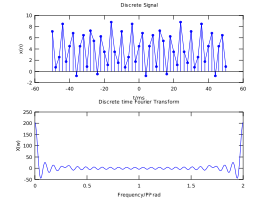

In [4]:
Ts=1.0/500;
n=-25:25;
w=[0:1000]/1000*2*pi;
x=4+cos(150*pi*n*Ts+pi/3)+4*sin(350*pi*Ts*n);
X=x*exp(-j*n'*w);
X=real(X);
subplot(2,1,1,'fontsize',5);plot(n*1000*Ts,x,'fontsize',5);
h=get(gcf, "currentaxes");
set(h, "fontsize", 5);
xlabel('t/ms','fontsize',5);ylabel('x(n)','fontsize',5);
title('Discrete Signal','fontsize',5);hold on;
h=stem(n*Ts*1000,x,'.');
set(h, "marker", 'point');
gtext('Ts=0.2 msec','fontsize',5);hold off

subplot(2,1,2);plot(w/pi,X);
xlabel('Frequency/Pi*rad','fontsize',5);
ylabel('X(w)','fontsize',5);
title('Discrete time Fourier Transform','fontsize',5);
h=get(gcf, "currentaxes");
set(h, "fontsize", 5);

## Question 4

Write a MATLAB function to compute the DTFT of a finite-duration sequence.

The format of the function should be:
```
function [X]=dtft(x,n,w)
% Compute Discrete-time Fourier Transform
% [X]=dtft(x,n,w)
% X=DTFT values computed at w frequencies
% x=finite duration sequence over n
% n=sample location vector
% w=frequency location vector
```

In [6]:
function [X]=dtft(x,n,w)
% Compute Discrete-time Fourier Transform
% [X]=dtft(x,n,w)
% X=DTFT values computed at w frequencies
% x=finite duration sequence over n
% n=sample location vector
% w=frequency location vector

X=x*exp(-j*n'*w);
end

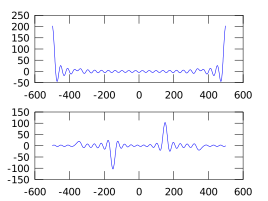

In [7]:
n=-25:25;
w=[0:1000]/1000*2*pi;
x=4+cos(150*pi*n*Ts+pi/3)+4*sin(350*pi*Ts*n);
subplot(2,1,1);plot([-500:500],real(dtft(x,n,w)));
subplot(2,1,2);plot([-500:500],imag(dtft(x,n,w)));